# Using Fast.AI and ResNet-34

In [1]:
import torch
from fastai.vision.all import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataLoaders.from_folder(path, train='train', valid='valid')

## Using ResNet-34 for this task

In [3]:
learn = cnn_learner(data, resnet34, metrics=accuracy)

/Users/adityanarayan/anaconda3/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/Users/adityanarayan/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/adityanarayan/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Model Training

In [4]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.277777,0.127541,0.959764,00:18
1,0.092990,0.050084,0.985280,00:17
2,0.047462,0.044198,0.987733,00:16
3,0.032368,0.033793,0.990186,00:16
4,0.019583,0.031521,0.990186,00:16


In [5]:
preds, targets = learn.get_preds()

In [6]:
pred_labels = torch.argmax(preds, dim=1)
true_labels = targets

## Model Accuracy

In [7]:
accuracy = (pred_labels == true_labels).float().mean().item()
print("Accuracy:", accuracy)

Accuracy: 0.9901864528656006


## Classification Report

In [8]:
print("Classification Report:")
print(classification_report(true_labels, pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1010
           1       0.99      0.99      0.99      1028

    accuracy                           0.99      2038
   macro avg       0.99      0.99      0.99      2038
weighted avg       0.99      0.99      0.99      2038



## Confusion matrix 

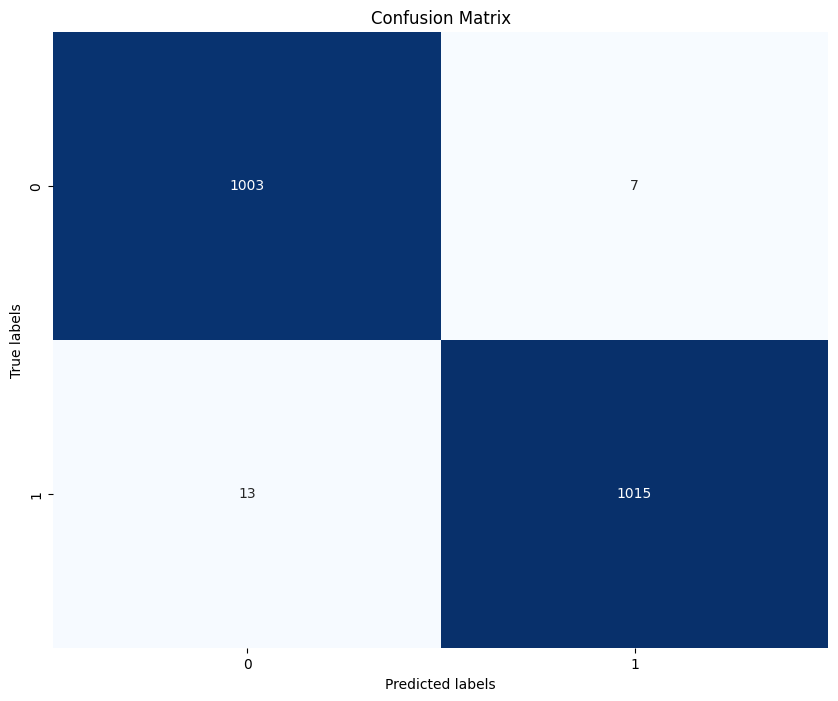

In [9]:
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

## Actual vs Predicted

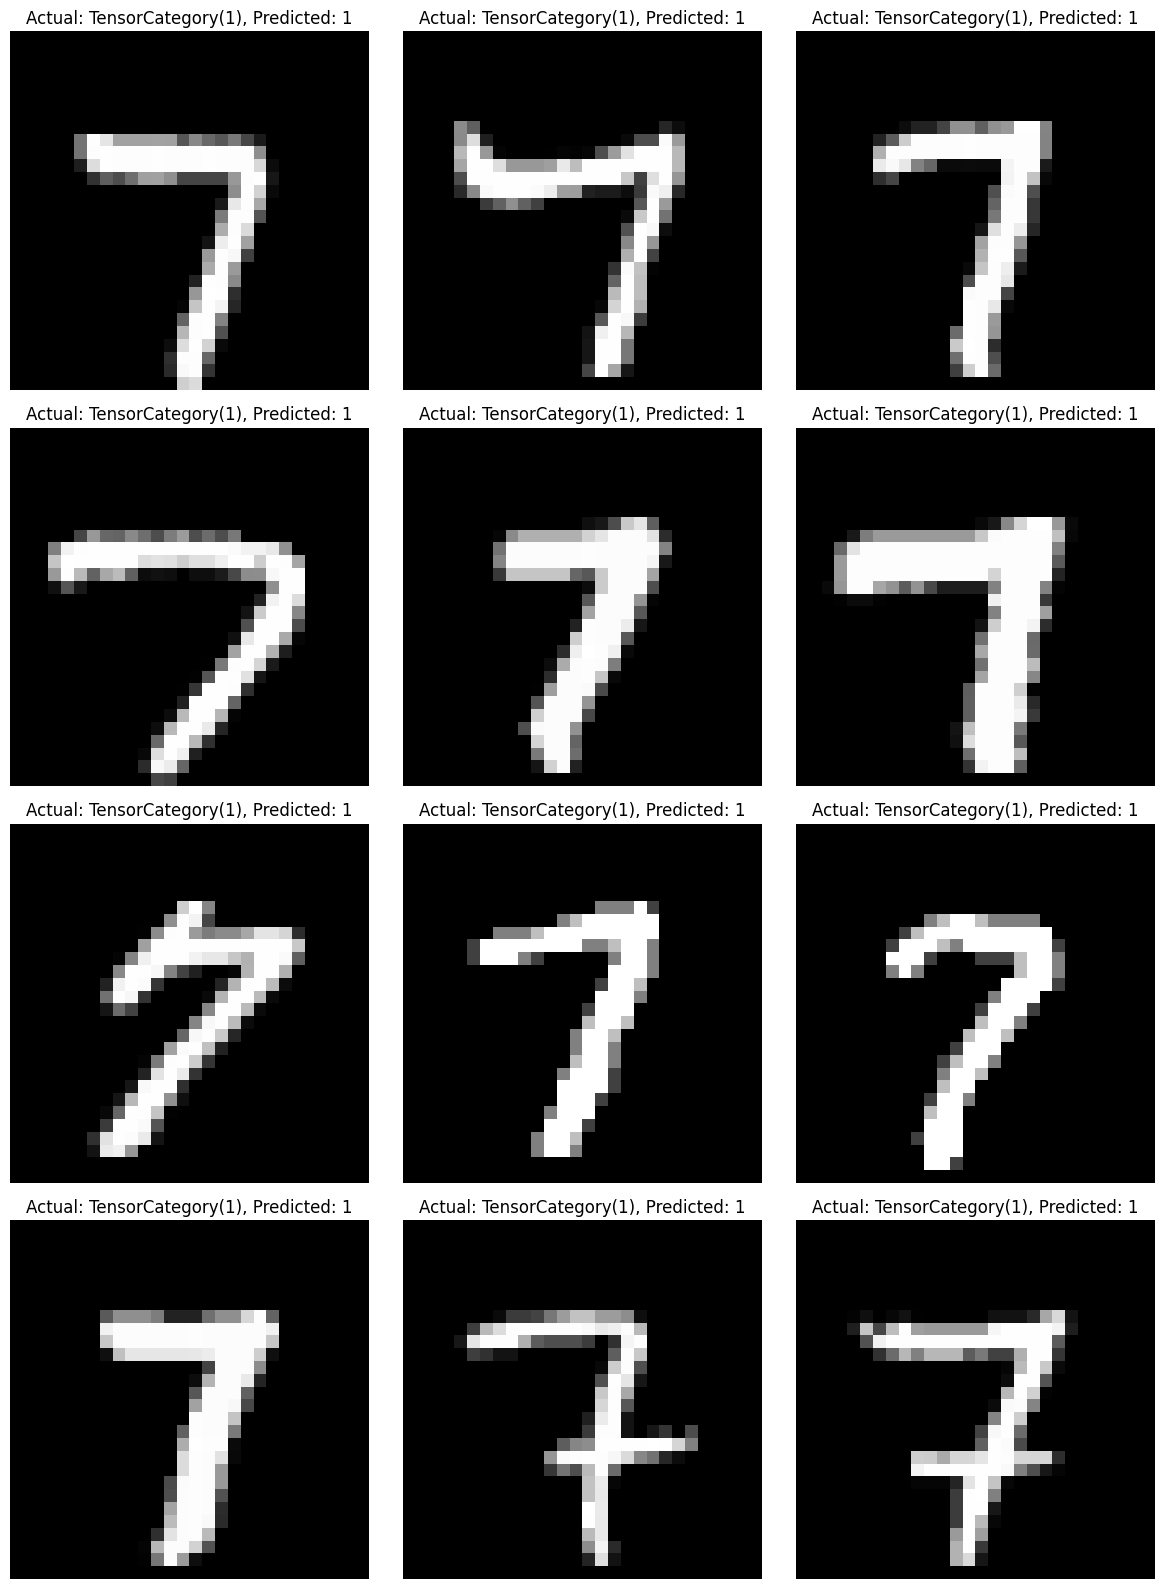

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(12, 16))
for i, ax in enumerate(axs.flat):
    img = data.valid_ds[i][0]
    label = data.valid_ds[i][1]
    pred_label = pred_labels[i]
    img.show(ax=ax)
    ax.set_title(f"Actual: {label}, Predicted: {pred_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()